In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class LeastSquares:
    """
    Clase simple para regresión lineal usando ecuaciones normales.
    Modelo: h(X; θ) = θ₀ + θ₁x
    """
    
    def __init__(self):
        self.theta = None
        self.X_train = None
        self.y_train = None
    
    def load_data(self, csv_path: str):
        """Carga datos desde CSV"""
        data = pd.read_csv(csv_path)
        return data['X'].values, data['y'].values
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        """Ajusta el modelo usando ecuaciones normales"""
        self.X_train = X.copy()
        self.y_train = y.copy()
        
        # Matriz de diseño [1, x]
        X_design = np.column_stack([np.ones(len(X)), X])
        
        # Ecuaciones normales: θ = (X^T X)^(-1) X^T y
        self.theta = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)
    
    def predict(self, X: np.ndarray):
        """Predicciones del modelo"""
        return self.theta[0] + self.theta[1] * X
    
    def error(self):
        """Error cuadrático medio"""
        predictions = self.predict(self.X_train)
        return np.mean((self.y_train - predictions) ** 2)
    
    def plot(self):
        """Gráfica datos y modelo"""
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X_train, self.y_train, alpha=0.6, label='Datos')
        
        X_line = np.linspace(self.X_train.min(), self.X_train.max(), 100)
        y_line = self.predict(X_line)
        plt.plot(X_line, y_line, 'r-', label='Modelo')
        
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


Parámetros ajustados (θ): [ 9.79628653 -1.15631734]
Error cuadrático medio: 1.1421433790256026


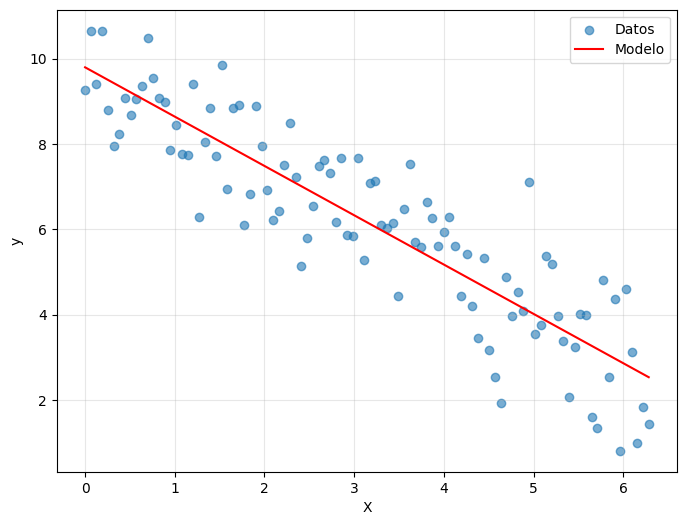

In [4]:
model = LeastSquares()
X, y = model.load_data('Linear.csv')
model.fit(X, y)
print("Parámetros ajustados (θ):", model.theta)
print("Error cuadrático medio:", model.error())
model.plot()